In [3]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

TARGET = 'fallsBin'
TEST_RATIO = 0.2
RANDOM_STATE = 42

# Data Loading
data = pd.read_csv("./stats/dataClean v2.csv")

# Converting Martial Status to Single and Not Single (due to the small number of samples in the other categories)
# Single -> 0, Not Single -> 1
data['Marital'] = data['Marital'].apply(lambda x: 1 if x in [1, 6] else 0)

# For Education, a value of 5 mean prefer not to answer so change these to 0
# Change 2 to 1 (High School), 3 to 2 (College) and 4 to 3 (Higher)
data['Education'] = data['Education'].apply(lambda x: 0 if x == 5 else x-1 if x in [2, 3, 4] else x)
# Converting Education to One Hot Encoding
encoder = OneHotEncoder()
encoded_education = encoder.fit_transform(data[['Education']])
data_encoded = pd.concat([data.drop(['Education'], axis=1), pd.DataFrame(encoded_education.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

# Converting Ethinicity to White, Asians and Others
# White -> 1, Asian -> 2, Others -> 3
data['EthCat'] = data['EthCat'].apply(lambda x: 1 if x == 1 else 2 if x == 2 else 3)
# Converting Ethnicity to One Hot Encoding
encoded_ethnicity = encoder.fit_transform(data[['EthCat']])
data_encoded = pd.concat([data.drop(['EthCat'], axis=1), pd.DataFrame(encoded_ethnicity.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

# For Employment, a value of 10 mean prefer not to answer so change these to 0
data['Employment'] = data['Employment'].apply(lambda x: 0 if x == 10 else x)
# Converting Employment to One Hot Encoding
encoded_employment = encoder.fit_transform(data[['Employment']])
data_encoded = pd.concat([data.drop(['Employment'], axis=1), pd.DataFrame(encoded_employment.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

# Splitting the data
predictors = data.drop(TARGET, axis=1)
response = data[TARGET]
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, 
                                                                                    response, 
                                                                                    test_size=TEST_RATIO, 
                                                                                    stratify=response, 
                                                                                    random_state=RANDOM_STATE)

# Standardizing/normalizing the data
std_scalar = StandardScaler()
minmax_scalar = MinMaxScaler()

# Exclude all categorical columns from Standardizing/normalizing
categorical_columns = [
'Sex',
'Income',
'Marital',
'OA_check',
'stress',
'PA_cat',
'numMedCond',
'backpain',
'depression',
'highBP',
'falling_1',
'falling_2',
'falling_3',
'Education_0',
'Education_1',
'Education_2',
'Education_3',
'EthCat_1',
'EthCat_2',
'EthCat_3',
'Employment_0',
'Employment_1',
'Employment_2',
'Employment_3',
'Employment_4',
'Employment_5',
'Employment_6',
'Employment_7',
'Employment_8'
]

def scaling_data(data_train, data_test, scaling_function, exclude = []):
    predictors_train_to_scale = data_train.drop(exclude, axis=1)
    predictors_test_to_scale = data_test.drop(exclude, axis=1)

    predictors_train_scaled = scaling_function.fit_transform(predictors_train_to_scale)
    predictors_test_scaled = scaling_function.transform(predictors_test_to_scale)

    predictors_train_scaled_df = pd.DataFrame(predictors_train_scaled, columns=predictors_train_to_scale.columns, index=predictors_train_to_scale.index)
    predictors_test_scaled_df = pd.DataFrame(predictors_test_scaled, columns=predictors_test_to_scale.columns, index=predictors_test_to_scale.index)

    predictors_train_scaled_df = pd.concat([predictors_train_scaled_df, data_train[exclude]], axis=1)
    predictors_test_scaled_df = pd.concat([predictors_test_scaled_df, data_test[exclude]], axis=1)
    
    return predictors_train_scaled_df, predictors_test_scaled_df

predictors_train_standardized_df, predictors_test_standardized_df = scaling_data(predictors_train.copy(), predictors_test.copy(), StandardScaler(), exclude=categorical_columns)
predictors_train_normalized_df, predictors_test_normalized_df = scaling_data(predictors_train.copy(), predictors_test.copy(), MinMaxScaler(), exclude=categorical_columns)

In [11]:
predictors_train_normalized_df.describe()

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,EthCat_3,Employment_0,Employment_1,Employment_2,Employment_3,Employment_4,Employment_5,Employment_6,Employment_7,Employment_8
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,0.347362,0.718562,0.286814,0.150583,0.315151,0.282757,0.487145,0.189377,0.468466,0.589874,...,0.145062,0.009259,0.469136,0.061728,0.015432,0.009259,0.317901,0.083333,0.006173,0.027778
std,0.158816,0.114726,0.149402,0.115553,0.182605,0.105368,0.162221,0.061916,0.163737,0.115799,...,0.352708,0.095927,0.499818,0.241034,0.123454,0.095927,0.466381,0.276813,0.078446,0.164590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240485,0.650087,0.182990,0.068177,0.184271,0.224016,0.376882,0.164692,0.356843,0.528612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.332150,0.737143,0.257732,0.132646,0.284499,0.280558,0.485821,0.194230,0.451380,0.610247,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.442640,0.786379,0.350515,0.204120,0.417152,0.343595,0.592201,0.214782,0.564933,0.659293,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
predictors_train_normalized_df[categorical_columns].describe()

,Sex,Income,Marital,OA_check,stress,PA_cat,numMedCond,backpain,depression,highBP,...,EthCat_3,Employment_0,Employment_1,Employment_2,Employment_3,Employment_4,Employment_5,Employment_6,Employment_7,Employment_8
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,0.524691,4.450617,0.537037,0.083333,3.351852,1.719136,0.487654,0.083333,0.043210,0.064815,...,0.145062,0.009259,0.469136,0.061728,0.015432,0.009259,0.317901,0.083333,0.006173,0.027778
std,0.500162,1.241952,0.499398,0.276813,2.336869,0.543584,0.867277,0.276813,0.203644,0.246580,...,0.352708,0.095927,0.499818,0.241034,0.123454,0.095927,0.466381,0.276813,0.078446,0.164590
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,1.000000,0.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,1.000000,1.000000,10.000000,2.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

TARGET = 'fallsBin'
TEST_RATIO = 0.3
RANDOM_STATE = 42

# Data Loading
data = pd.read_csv("./stats/dataClean v2.csv")

# Converting Martial Status to Single and Not Single (due to the small number of samples in the other categories)
# Single -> 0, Not Single -> 1
data['Marital'] = data['Marital'].apply(lambda x: 1 if x in [1, 6] else 0)

# For Education, a value of 5 mean prefer not to answer so change these to 0
# Change 2 to 1 (High School), 3 to 2 (College) and 4 to 3 (Higher)
data['Education'] = data['Education'].apply(lambda x: 0 if x == 5 else x-1 if x in [2, 3, 4] else x)
# Converting Education to One Hot Encoding
encoder = OneHotEncoder()
encoded_education = encoder.fit_transform(data[['Education']])
data_encoded = pd.concat([data.drop(['Education'], axis=1), pd.DataFrame(encoded_education.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

# Converting Ethinicity to White, Asians and Others
# White -> 1, Asian -> 2, Others -> 3
data['EthCat'] = data['EthCat'].apply(lambda x: 1 if x == 1 else 2 if x == 2 else 3)
# Converting Ethnicity to One Hot Encoding
encoded_ethnicity = encoder.fit_transform(data[['EthCat']])
data_encoded = pd.concat([data.drop(['EthCat'], axis=1), pd.DataFrame(encoded_ethnicity.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

# For Employment, a value of 10 mean prefer not to answer so change these to 0
data['Employment'] = data['Employment'].apply(lambda x: 0 if x == 10 else x)
# Converting Employment to One Hot Encoding
encoded_employment = encoder.fit_transform(data[['Employment']])
data_encoded = pd.concat([data.drop(['Employment'], axis=1), pd.DataFrame(encoded_employment.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

# Splitting the data
predictors = data.drop(TARGET, axis=1)
response = data[TARGET]
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, 
                                                                                    response, 
                                                                                    test_size=TEST_RATIO, 
                                                                                    stratify=response, 
                                                                                    random_state=RANDOM_STATE)

# Standardizing/normalizing the data
std_scalar = StandardScaler()
minmax_scalar = MinMaxScaler()

# Exclude all categorical columns from Standardizing/normalizing
categorical_columns = [
'Sex',
'Income',
'Marital',
'OA_check',
'stress',
'PA_cat',
'numMedCond',
'backpain',
'depression',
'highBP',
'falling_1',
'falling_2',
'falling_3',
'Education_0',
'Education_1',
'Education_2',
'Education_3',
'EthCat_1',
'EthCat_2',
'EthCat_3',
'Employment_0',
'Employment_1',
'Employment_2',
'Employment_3',
'Employment_4',
'Employment_5',
'Employment_6',
'Employment_7',
'Employment_8'
]

def scaling_data(data_train, data_test, scaling_function, exclude = []):
    predictors_train_to_scale = data_train.drop(exclude, axis=1)
    predictors_test_to_scale = data_test.drop(exclude, axis=1)

    predictors_train_scaled = scaling_function.fit_transform(predictors_train_to_scale)
    predictors_test_scaled = scaling_function.transform(predictors_test_to_scale)

    predictors_train_scaled_df = pd.DataFrame(predictors_train_scaled, columns=predictors_train_to_scale.columns, index=predictors_train_to_scale.index)
    predictors_test_scaled_df = pd.DataFrame(predictors_test_scaled, columns=predictors_test_to_scale.columns, index=predictors_test_to_scale.index)

    predictors_train_scaled_df = pd.concat([predictors_train_scaled_df, data_train[exclude]], axis=1)
    predictors_test_scaled_df = pd.concat([predictors_test_scaled_df, data_test[exclude]], axis=1)
    
    return predictors_train_scaled_df, predictors_test_scaled_df

predictors_train_standardized_df, predictors_test_standardized_df = scaling_data(predictors_train.copy(), predictors_test.copy(), StandardScaler(), exclude=categorical_columns)
predictors_train_normalized_df, predictors_test_normalized_df = scaling_data(predictors_train.copy(), predictors_test.copy(), MinMaxScaler(), exclude=categorical_columns)


# Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
# from skorch import NeuralNetClassifier

classifiers = {

    'Logistic Regression': LogisticRegression(C=5, max_iter=1000, penalty='l2', solver= 'liblinear'),
    # 'Random Forest': RandomForestClassifier(),
    # 'Gradient Boosting': XGBClassifier(),
    # 'Support Vector Machine': SVC(),
    # 'Decision Tree': DecisionTreeClassifier(),
    # 'Gaussian Naive Bayes': GaussianNB(),
    # 'Gaussian Process': GaussianProcessClassifier(),
    # #'Neural Network': NeuralNetClassifier()
}

# Training the models

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

classifiers['Logistic Regression'].fit(predictors_train_standardized_df, response_train)
predictions = classifiers['Logistic Regression'].predict(predictors_test_standardized_df)


kf = StratifiedKFold(n_splits=5, shuffle=False)

def training_and_prediction(classifier, predictors_train, response_train, predictors_test):
    # classifier.fit(predictors_train, response_train)
    # return classifier.predict(predictors_test)
    grid_lr = GridSearchCV(classifier, param_grid=params, cv=kf, 
                          scoring='recall').fit(predictors_train, response_train)
    
    print('Best parameters:', grid_lr.best_params_)
    print('Best score:', grid_lr.best_score_)
    
    return grid_lr.best_estimator_.predict(predictors_test)


predictions_standardized = {
    name: training_and_prediction(classifier, predictors_train_standardized_df, response_train, predictors_test_standardized_df) 
    for 
    name, classifier 
    in 
    classifiers.items()
    }


predictions_normalized = {
    name: training_and_prediction(classifier, predictors_train_normalized_df, response_train, predictors_test_normalized_df) 
    for 
    name, classifier 
    in 
    classifiers.items()
    }

# Evaluating the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(predictions, response_test):
    return {
        'accuracy': accuracy_score(response_test, predictions),
        'precision': precision_score(response_test, predictions),
        'recall': recall_score(response_test, predictions),
        'f1': f1_score(response_test, predictions),
        'roc_auc': roc_auc_score(response_test, predictions)
    }

evaluation_standardized = {
    name: evaluate_model(predictions, response_test) 
    for 
    name, predictions 
    in 
    predictions_standardized.items()
}

evaluation_normalized = {
    name: evaluate_model(predictions, response_test) 
    for 
    name, predictions 
    in 
    predictions_normalized.items()
}

# ROC Curve
from sklearn.metrics import roc_curve

def roc_curve_model(classifier, predictors_test, response_test):
    return roc_curve(response_test, classifier.predict_proba(predictors_test)[:,1])

try:
    roc_curve_standardized = {
        name: roc_curve_model(classifier, predictors_test_standardized_df, response_test) 
        for 
        name, classifier 
        in 
        classifiers.items()
    }

    roc_curve_normalized = {
        name: roc_curve_model(classifier, predictors_test_normalized_df, response_test) 
        for 
        name, classifier 
        in 
        classifiers.items()
    }
except:
    print('ROC Curve not available for this model')




e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The ma

Best parameters: {'C': 78.47599703514607, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.37


e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The ma

Best parameters: {'C': 29.763514416313132, 'max_iter': 2500, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.25


e:\PhD Work (Local)\Sit to Stand Fall Risk\sit2stand-fall\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [62]:
# Best parameters: {'C': 29.763514416313132, 'max_iter': 2500, 'penalty': 'l1', 'solver': 'saga'}
# Best score: 0.25
evaluation_standardized

{'Logistic Regression': {'accuracy': 0.860655737704918,
  'precision': 0.1111111111111111,
  'recall': 0.1,
  'f1': 0.10526315789473684,
  'roc_auc': 0.5142857142857143}}

In [27]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

TARGET = 'fallsBin'
TEST_RATIO = 0.2
RANDOM_STATE = 42

# Data Loading
data = pd.read_csv("./stats/dataClean v2.csv")

# Converting Martial Status to Single and Not Single (due to the small number of samples in the other categories)
# Single -> 0, Not Single -> 1
data['Marital'] = data['Marital'].apply(lambda x: 1 if x in [1, 6] else 0)

# For Education, a value of 5 mean prefer not to answer so change these to 0
# Change 2 to 1 (High School), 3 to 2 (College) and 4 to 3 (Higher)
data['Education'] = data['Education'].apply(lambda x: 0 if x == 5 else x-1 if x in [2, 3, 4] else x)
# Converting Education to One Hot Encoding
encoder = OneHotEncoder()
encoded_education = encoder.fit_transform(data[['Education']])
data_encoded = pd.concat([data.drop(['Education'], axis=1), pd.DataFrame(encoded_education.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

# Converting Ethinicity to White, Asians and Others
# White -> 1, Asian -> 2, Others -> 3
data['EthCat'] = data['EthCat'].apply(lambda x: 1 if x == 1 else 2 if x == 2 else 3)
# Converting Ethnicity to One Hot Encoding
encoded_ethnicity = encoder.fit_transform(data[['EthCat']])
data_encoded = pd.concat([data.drop(['EthCat'], axis=1), pd.DataFrame(encoded_ethnicity.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

# For Employment, a value of 10 mean prefer not to answer so change these to 0
data['Employment'] = data['Employment'].apply(lambda x: 0 if x == 10 else x)
# Converting Employment to One Hot Encoding
encoded_employment = encoder.fit_transform(data[['Employment']])
data_encoded = pd.concat([data.drop(['Employment'], axis=1), pd.DataFrame(encoded_employment.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

data.to_csv('dataClean v3.csv', index=False)

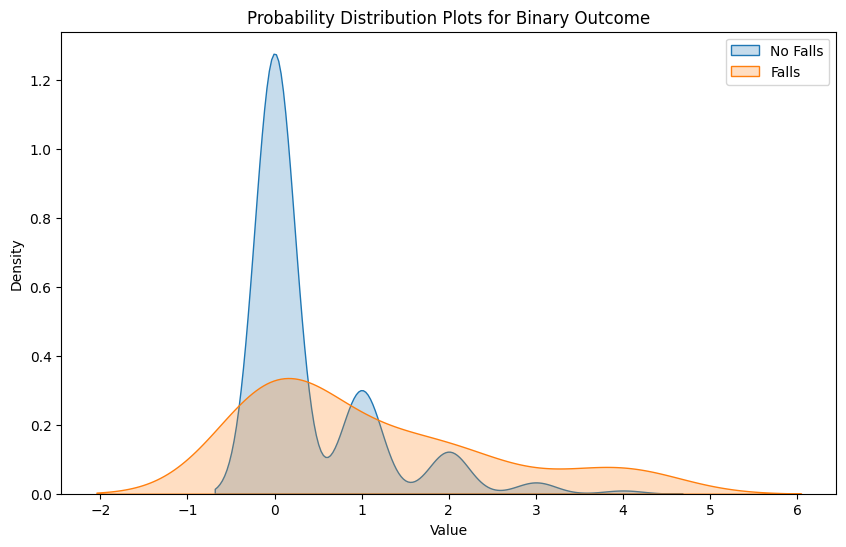

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("./stats/dataClean v3.csv")


# Separate data by binary outcome
data_0 = data[data['fallsBin'] == 0]['numMedCond']
data_1 = data[data['fallsBin'] == 1]['numMedCond']

# Plot KDEs on the same graph
plt.figure(figsize=(10, 6))
sns.kdeplot(data_0, label='No Falls', fill=True)
sns.kdeplot(data_1, label='Falls', fill=True)
plt.title('Probability Distribution Plots for Binary Outcome')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()